9801
(9801,)
9801
(9801,)
9801


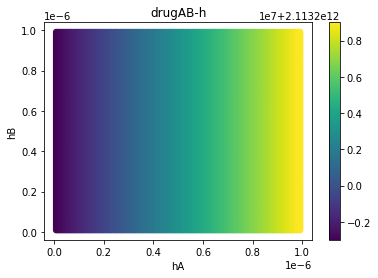

In [3]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 


initial_N = 10**9
t_end = 1000
tan = 307

## parameters
aA = -0.17
bA = 0.045
cA = -0.13
fA = 0.022
gA = 0.0000001 # W-X
# hA = 0.0000001 # W-Y
kA = 0.0000001 # W-Z
pA = 0.0000001 # X-Z
qA = 0.0000001 # Y-Z

aB = -0.32
bB = -0.15
cB = 0.024
fB = 0.022
gB = 0.0000001 # W-X
# hB = 0.0000001 # W-Y
kB = 0.0000001 # W-Z
pB = 0.0000001 # X-Z
qB = 0.0000001 # Y-Z

finalnumber = list()
x = list()
y = list()

for hA in np.arange(0.00000001, 0.000001, 0.00000001):
    for hB in np.arange(0.00000001, 0.000001, 0.00000001):
        x.append(hA)
        paramsA = (aA, bA, cA, fA, gA, hA, kA, pA, qA)
        y.append(hB)
        paramsB = (aB, bB, cB, fB, gB, hB, kB, pB, qB)
        list_t = np.arange(0, tan, 0.01)
        list_t1 = np.arange(tan, t_end, 0.1)
        cell_init = [initial_N - 10**4 - 10**4 - 10, 10**4, 10**4, 10]
        cells = odeint(func, cell_init, list_t, args = paramsA)
        i = len(list_t)-1
        cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
        cell1 = odeint(func, cell1_init, list_t1, args = paramsB)
        celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
        celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
        finalnumber.append(celltotal1[-1])

X = np.array(x)
print(len(x))
print(X.shape)
Y = np.array(y)
print(len(y))
print(Y.shape)
# X, Y = np.meshgrid(X, Y)
Z = np.array(finalnumber, dtype=float)
print(len(finalnumber))
    
plt.scatter(X, Y, c=Z, cmap=plt.cm.get_cmap('viridis') )
plt.colorbar()  # Add a colorbar for reference
plt.xlabel('hA')
plt.ylabel('hB')
plt.title('drugAB-h')

plt.show()

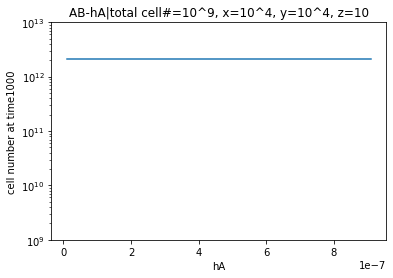

In [2]:
## bA
aBa = -0.32
bBa = -0.15
cBa = 0.024
fBa = 0.022
gBa = 0.0000001 # W-X
hBa = 0.0000001 # W-Y
kBa = 0.0000001 # W-Z
pBa = 0.0000001 # X-Z
qBa = 0.0000001
paramsBa = (aBa, bBa, cBa, fBa, gBa, hBa, kBa, pBa, qBa)

yA = list()
finalnumbera = list()

for hAa in np.arange(0.00000001, 0.000001, 0.0000001):
    yA.append(hAa)
    paramsAa = (aA, bA, cA, fA, gA, hAa, kA, pA, qA)
    list_t = np.arange(0, tan, 0.01)
    list_t1 = np.arange(tan, t_end, 0.1)
    cell_init = [initial_N - 10**4 - 10**4 - 10, 10**4, 10**4, 10]
    cells = odeint(func, cell_init, list_t, args = paramsAa)
    i = len(list_t)-1
    cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
    cell1 = odeint(func, cell1_init, list_t1, args = paramsBa)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
    finalnumbera.append(celltotal1[-1])

subfigA = plt.figure()
axA = subfigA.add_subplot(111)
axA.plot(yA, finalnumbera, label = 'total cell number')
axA.set_yscale('log')
axA.set_ylim(10**9, 10**13)
axA.set_xlabel('hA')
axA.set_ylabel('cell number at time1000') 
axA.set_title('AB-hA|total cell#=10^9, x=10^4, y=10^4, z=10')

plt.show()

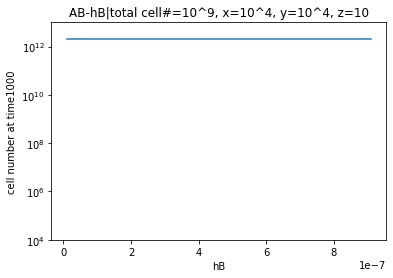

In [3]:
## bB
aAb = -0.17
bAb = 0.045
cAb = -0.13
fAb = 0.022
gAb = 0.0000001 # W-X
hAb = 0.0000001 # W-Y
kAb = 0.0000001 # W-Z
pAb = 0.0000001 # X-Z
qAb = 0.0000001 # Y-Z
paramsAb = (aAb, bAb, cAb, fAb, gAb, hAb, kAb, pAb, qAb )

yB = list()
finalnumberb = list()

for hBb in np.arange(0.00000001, 0.000001, 0.0000001):
    yB.append(hBb)
    paramsBb = (aB, bB, cB, fB, gB, hBb, kB, pB, qB)
    list_t = np.arange(0, tan, 0.01)
    list_t1 = np.arange(tan, t_end, 0.1)
    cell_init = [initial_N - 10**4 - 10**4 - 10, 10**4, 10**4, 10]
    cells = odeint(func, cell_init, list_t, args = paramsAb)
    i = len(list_t)-1
    cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
    cell1 = odeint(func, cell1_init, list_t1, args = paramsBb)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
    finalnumberb.append(celltotal1[-1])

subfigB = plt.figure()
axB = subfigB.add_subplot(111)
axB.plot(yB, finalnumberb, label = 'total cell number')
axB.set_yscale('log')
axB.set_ylim(10**4, 10**13)
axB.set_xlabel('hB')
axB.set_ylabel('cell number at time1000') 
axB.set_title('AB-hB|total cell#=10^9, x=10^4, y=10^4, z=10')

plt.show()